In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [16]:

df_diab = pd.read_csv("/Users/tylerhaims/Documents/GitHub/Diabetes/Diabetes2021/diabetes_binary_health_indicators_BRFSS2021.csv")
print(len(df_diab['BMI']))

df_diab_noscale = df_diab.drop(columns=['MentHlth','NoDocbcCost', 'Sex', 'Fruits'])
pca2 = PCA(n_components=2)
pca2.fit(df_diab_noscale)
pca_data2 = pca2.transform(df_diab_noscale)
pca_df2 = pd.DataFrame(data=pca_data2, columns=['PC1', 'PC2'])


pca = PCA(n_components=2)  # Specify the number of components you want to keep
pca.fit(df_diab)
pca_data = pca.transform(df_diab)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


236378


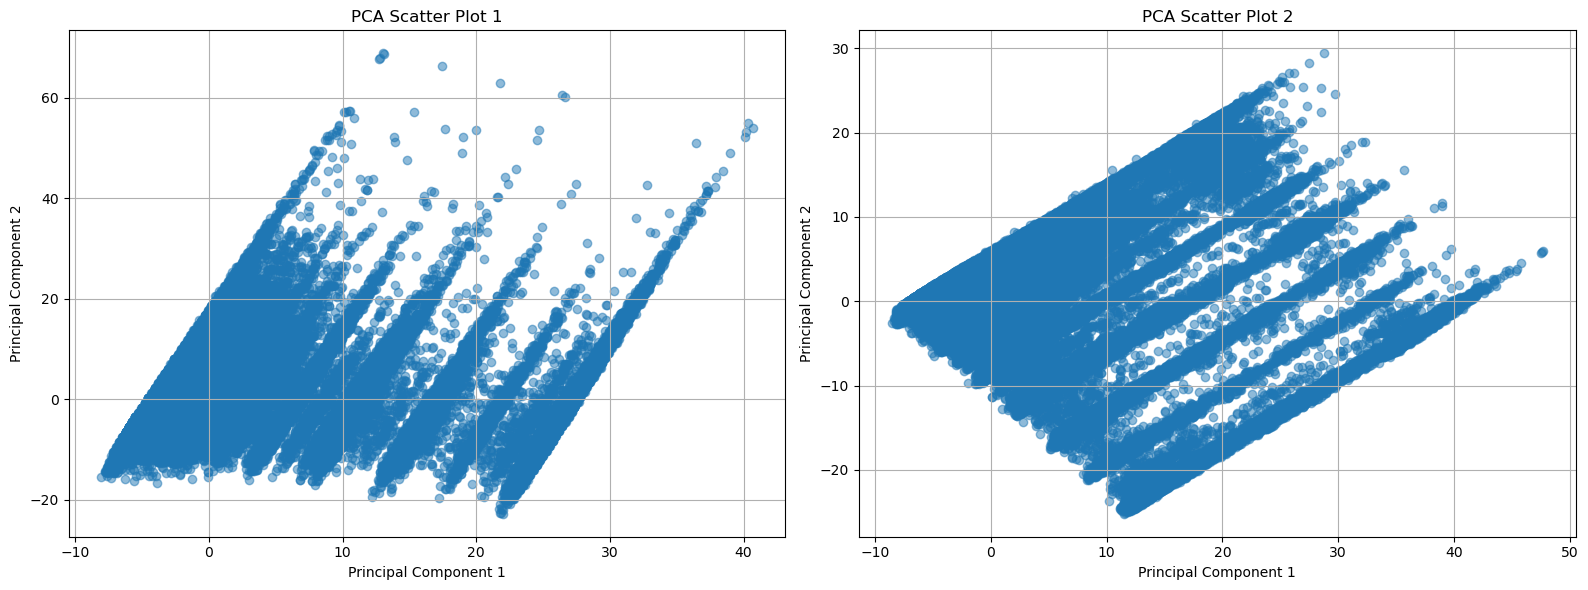

Explained Variance Ratio: [0.45241781 0.23708678]
Cumulative Explained Variance Ratio: [0.45241781 0.68950458]
Singular Values: [4546.38063404 3291.16467255]
Number of components to retain 95% of variance: 1
PC1 LAODINGS FOR DF WITHOUT DROPPED DATA
                Variable  Loading_PC1  Abs_Loading_PC1
16              PhysHlth     0.743781         0.743781
15              MentHlth     0.636361         0.636361
4                    BMI     0.180313         0.180313
21                Income    -0.071915         0.071915
14               GenHlth     0.056489         0.056489
17              DiffWalk     0.016012         0.016012
20             Education    -0.014627         0.014627
19                   Age    -0.011336         0.011336
8           PhysActivity    -0.011212         0.011212
1                 HighBP     0.006849         0.006849
5                 Smoker     0.006630         0.006630
0        Diabetes_binary     0.005758         0.005758
13           NoDocbcCost     0.00497

In [19]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first scatter plot on the first subplot
axes[0].scatter(pca_data2[:, 0], pca_data2[:, 1], alpha=0.5)
axes[0].set_title('PCA Scatter Plot 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

# Plot the second scatter plot on the second subplot
axes[1].scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
axes[1].set_title('PCA Scatter Plot 2')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
singular_values = pca.singular_values_


most_important_components = {
    'explained_variance_ratio': explained_variance_ratio,
    'cumulative_explained_variance_ratio': cumulative_explained_variance_ratio,
    'singular_values': singular_values
}
print("Explained Variance Ratio:", most_important_components['explained_variance_ratio'])
print("Cumulative Explained Variance Ratio:", most_important_components['cumulative_explained_variance_ratio'])
print("Singular Values:", most_important_components['singular_values'])

loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]


threshold_variance = 0.95

# Find the number of components needed to reach the threshold variance
num_components_threshold = np.argmax(cumulative_explained_variance_ratio >= threshold_variance) + 1

print("Number of components to retain {:.0%} of variance:".format(threshold_variance), num_components_threshold)

# Create a DataFrame to display the loadings
print('PC1 LAODINGS FOR DF WITHOUT DROPPED DATA')
loadings_df = pd.DataFrame({'Variable': df_diab.columns, 'Loading_PC1': loadings_pc1})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df['Abs_Loading_PC1'] = abs(loadings_df['Loading_PC1'])
loadings_df_sorted = loadings_df.sort_values(by='Abs_Loading_PC1', ascending=False)

print(loadings_df_sorted)

print('PC2 LAODINGS FOR DF WITHOUT DROPPED DATA')
loadings_df2 = pd.DataFrame({'Variable': df_diab.columns, 'Loading_PC2': loadings_pc2})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df2['Abs_Loading_PC2'] = abs(loadings_df2['Loading_PC2'])
loadings_df_sorted2 = loadings_df2.sort_values(by='Abs_Loading_PC2', ascending=False)

print(loadings_df_sorted2)

In [8]:

#labels  = np.random.randint(2,size=236378)
#labels = np.array(df_diab['Diabetes_binary'])
labels = df_diab['Diabetes_binary']
#print(labels)
# for num in labels:
#     print(num)
# print(type(labels))

X_train, X_test, y_train, y_test = train_test_split(pca_data, labels, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

#conf_matrix = confusion_matrix(X_test, y_pred)



Accuracy: 0.8667822996869448


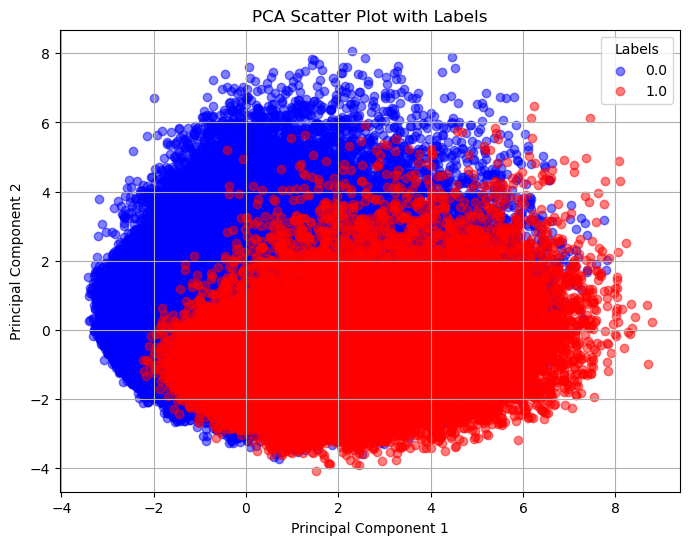

In [9]:
unique_labels = np.unique(labels)
colors = ['b', 'r']  # Define colors for each label, you can extend this for more labels

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

plt.title('PCA Scatter Plot with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.grid(True)
plt.show()

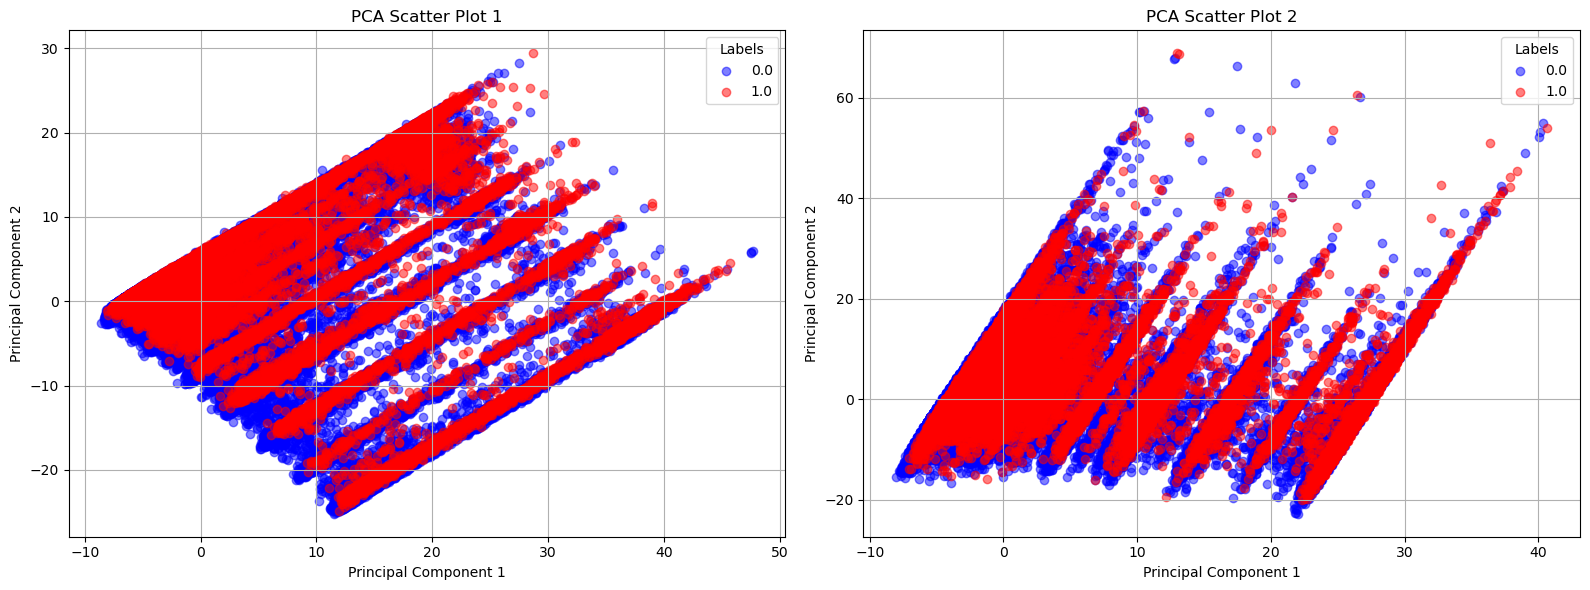

PC1 LAODINGS FOR DF WITHOUT DROPPED DATA
                Variable  Loading_PC1  Abs_Loading_PC1
16              PhysHlth     0.743781         0.743781
15              MentHlth     0.636361         0.636361
4                    BMI     0.180313         0.180313
21                Income    -0.071915         0.071915
14               GenHlth     0.056489         0.056489
17              DiffWalk     0.016012         0.016012
20             Education    -0.014627         0.014627
19                   Age    -0.011336         0.011336
8           PhysActivity    -0.011212         0.011212
1                 HighBP     0.006849         0.006849
5                 Smoker     0.006630         0.006630
0        Diabetes_binary     0.005758         0.005758
13           NoDocbcCost     0.004978         0.004978
2               HighChol     0.004842         0.004842
18                   Sex    -0.004378         0.004378
7   HeartDiseaseorAttack     0.004176         0.004176
9                 Fruits

KeyError: 'Loading_PC2'

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first scatter plot on the first subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[0].scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

axes[0].set_title('PCA Scatter Plot 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Labels')
axes[0].grid(True)

# Plot the second scatter plot on the second subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[1].scatter(pca_data2[mask, 0], pca_data2[mask, 1], c=color, label=label, alpha=0.5)

axes[1].set_title('PCA Scatter Plot 2')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Labels')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


236378
Explained variance ratio for each principal component:
PC1: 0.1580
PC2: 0.0860


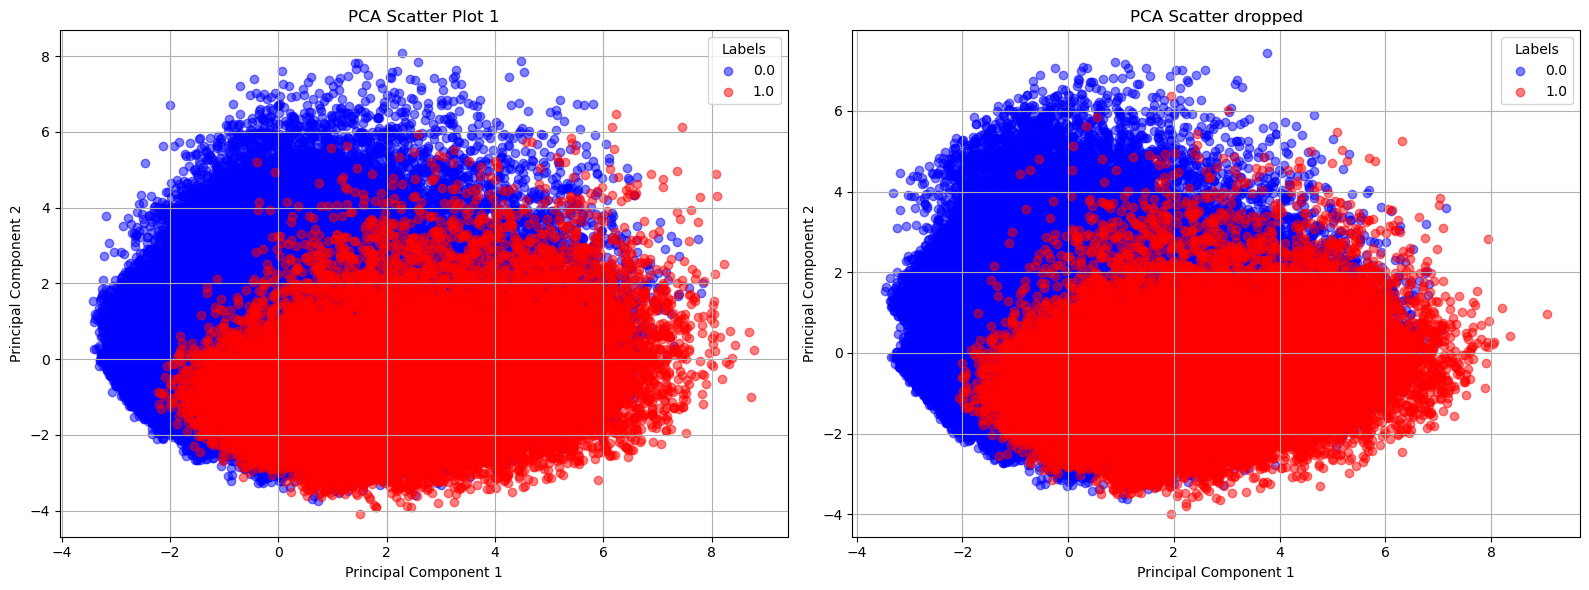

PC1 LAODINGS FOR DF WITHOUT DROPPED DATA
                Variable  Loading_PC3  Abs_Loading_PC3
14               GenHlth     0.396563         0.396563
17              DiffWalk     0.349796         0.349796
16              PhysHlth     0.327217         0.327217
21                Income    -0.304113         0.304113
8           PhysActivity    -0.264445         0.264445
1                 HighBP     0.263420         0.263420
0        Diabetes_binary     0.245620         0.245620
20             Education    -0.229385         0.229385
7   HeartDiseaseorAttack     0.217685         0.217685
19                   Age     0.195363         0.195363
2               HighChol     0.191032         0.191032
4                    BMI     0.188783         0.188783
15              MentHlth     0.169501         0.169501
6                 Stroke     0.160228         0.160228
5                 Smoker     0.159831         0.159831
10               Veggies    -0.107688         0.107688
13           NoDocbcCost

In [25]:
##THIS IS VERY IMPORTANT


df_diab = pd.read_csv("/Users/tylerhaims/Documents/GitHub/Diabetes/Diabetes2021/diabetes_binary_health_indicators_BRFSS2021.csv")
print(len(df_diab['BMI']))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_diab)
scaled_data
pca = PCA(n_components=2)  # Specify the number of components you want to keep
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

scaled_data2 = scaler.fit_transform(df_diab_noscale)
scaled_data2
pca2 = PCA(n_components=2)  # Specify the number of components you want to keep
pca2.fit(scaled_data2)
pca_data2 = pca2.transform(scaled_data2)
pca_df2 = pd.DataFrame(data=pca_data2, columns=['PC1', 'PC2'])
unique_labels = np.unique(labels)
colors = ['b', 'r']  # Define colors for each label, you can extend this for more labels

# plt.figure(figsize=(8, 6))
# for label, color in zip(unique_labels, colors):
#     mask = (labels == label)
#     plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

# plt.title('PCA Scatter Plot with Labels')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Labels')
# plt.grid(True)
# plt.show()
# Create a figure with two subplots side by side

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first scatter plot on the first subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[0].scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

axes[0].set_title('PCA Scatter Plot 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Labels')
axes[0].grid(True)

# Plot the second scatter plot on the second subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[1].scatter(pca_data2[mask, 0], pca_data2[mask, 1], c=color, label=label, alpha=0.5)

axes[1].set_title('PCA Scatter dropped')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Labels')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
loadings_pc3 = pca.components_[0]
loadings_pc4 = pca.components_[1]

print('PC1 LAODINGS FOR DF WITHOUT DROPPED DATA')
loadings_df3 = pd.DataFrame({'Variable': df_diab.columns, 'Loading_PC3': loadings_pc3})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df3['Abs_Loading_PC3'] = abs(loadings_df3['Loading_PC3'])
loadings_df_sorted3 = loadings_df3.sort_values(by='Abs_Loading_PC3', ascending=False)

print(loadings_df_sorted3)

print('PC2 LAODINGS FOR DF WITHOUT DROPPED DATA')
loadings_df4 = pd.DataFrame({'Variable': df_diab.columns, 'Loading_PC4': loadings_pc4})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df4['Abs_Loading_PC4'] = abs(loadings_df4['Loading_PC4'])
loadings_df_sorted4 = loadings_df4.sort_values(by='Abs_Loading_PC4', ascending=False)

print(loadings_df_sorted4)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, df_diab['Diabetes_binary'], test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8671841949403503


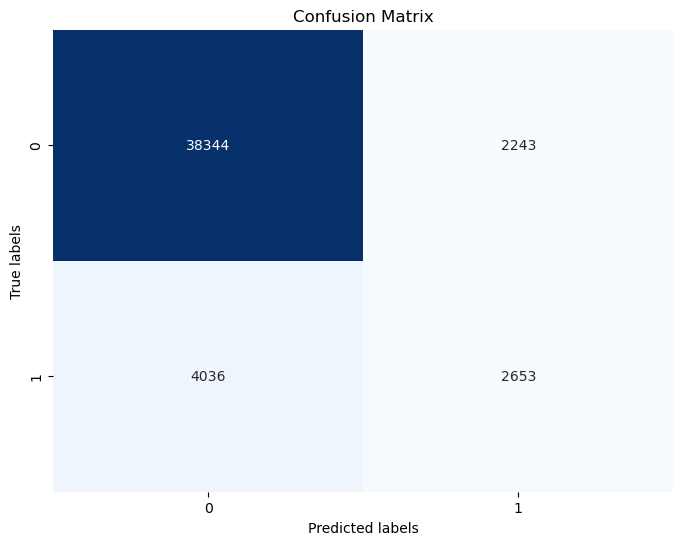

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# from sklearn.manifold import Isomap


# isomap = Isomap(n_neighbors=5, n_components=2)

# # Fit Isomap to the PCA-transformed data
# isomap_data = isomap.fit_transform(pca_data)

# # Convert Isomap result to DataFrame for visualization
# isomap_df = pd.DataFrame(data=isomap_data, columns=['Component 1', 'Component 2'])

# # Plot Isomap result
# plt.figure(figsize=(8, 6))
# plt.scatter(isomap_df['Component 1'], isomap_df['Component 2'], alpha=0.5)
# plt.title('Isomap of PCA-transformed Data')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.grid(True)
# plt.show()

Accuracy: 0.7731830104069718


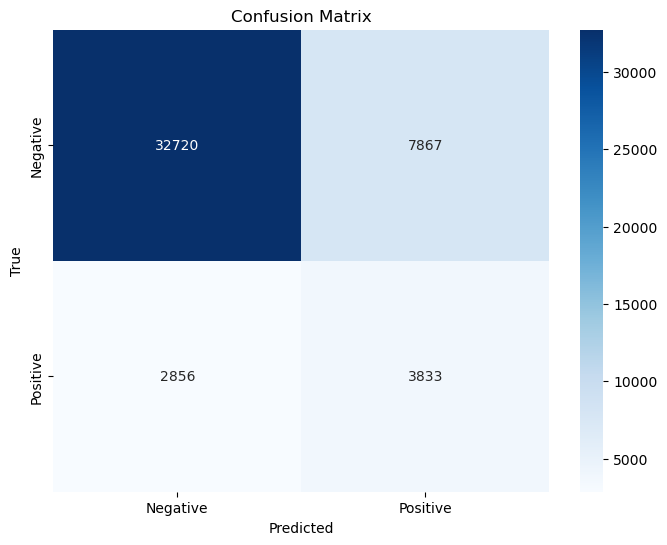

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = df_diab.drop('Diabetes_binary', axis=1)  # Features
y = df_diab['Diabetes_binary']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Negative', 'Positive']  # 0 = Negative and 1 = Positive

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_diab = pd.read_csv("/Users/tylerhaims/Documents/GitHub/Diabetes/Diabetes2021/diabetes_binary_health_indicators_BRFSS2021.csv")
print(len(df_diab['BMI']))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_diab)
scaled_data
pca = PCA(n_components=2)  # number of components kept
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


